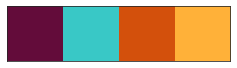

In [53]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [54]:
# Import my spotify data
songs = pd.read_csv("C:/Users/Ezhil Mathi/Downloads/data_moods (1).csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          686 non-null    object 
 1   danceability  686 non-null    float64
 2   loudness      686 non-null    float64
 3   speechiness   686 non-null    float64
 4   acousticness  686 non-null    float64
 5   liveness      686 non-null    float64
dtypes: float64(5), object(1)
memory usage: 32.3+ KB


In [55]:

#songs = songs.drop(['album','release_date','popularity','length','key','time_signature'],axis=1)
#songs.head()
#songs = songs.drop(['album'],axis=1)
#songs.head()

In [56]:
# to describe numerical features we can use describe()
songs.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.500553,-11.531020,0.053946,0.449749,0.166867
std,0.158955,7.468629,0.041374,0.410729,0.142128
min,0.078900,-42.018000,0.023200,0.000005,0.031800
25%,0.388000,-15.858750,0.033200,0.014825,0.092500
50%,0.505000,-9.358000,0.040700,0.359000,0.111000
75%,0.612000,-5.634500,0.057375,0.905750,0.173750
max,0.941000,1.342000,0.416000,0.996000,0.963000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F77C478490>,
      dtype=object)

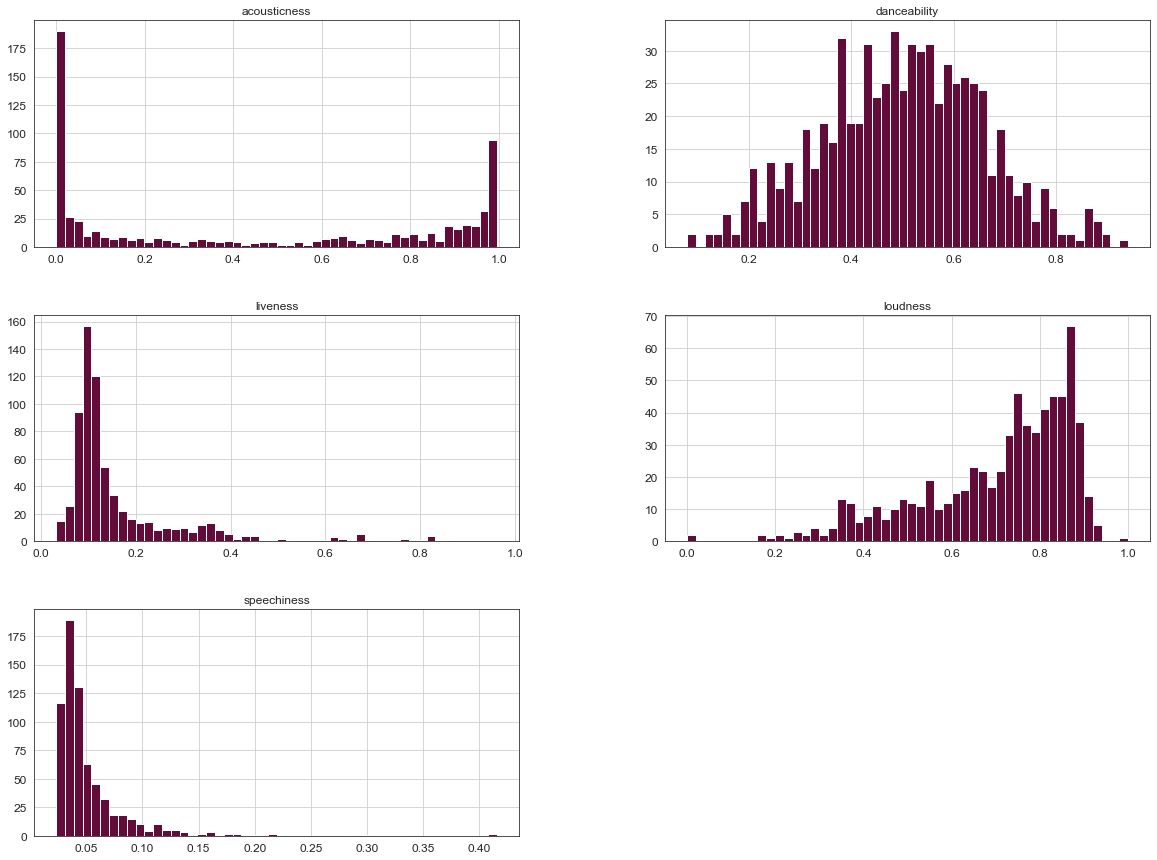

In [57]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)




songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [58]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [59]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name'],axis=1)
songs_features


,danceability,loudness,speechiness,acousticness,liveness
0,0.866,0.779912,0.0767,0.13700,0.0843
1,0.381,0.852145,0.0492,0.01890,0.1530
2,0.346,0.615590,0.0321,0.91300,0.0934
3,0.466,0.672509,0.0608,0.08900,0.1130
4,0.419,0.885932,0.1060,0.00171,0.1370
...,...,...,...,...,...
681,0.402,0.493612,0.0603,0.96100,0.0921
682,0.452,0.799516,0.0255,0.75700,0.1400
683,0.642,0.752583,0.0545,0.78600,0.0906
684,0.561,0.620826,0.0404,0.91300,0.1120


In [60]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [61]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.590243137971755)
For n_clusters = 3, silhouette score is 0.4416473717518205)
For n_clusters = 4, silhouette score is 0.35421019446105595)
For n_clusters = 5, silhouette score is 0.32879279483218943)
For n_clusters = 6, silhouette score is 0.28356221001459175)
For n_clusters = 7, silhouette score is 0.28655186475491884)
For n_clusters = 8, silhouette score is 0.2785574864556307)
For n_clusters = 9, silhouette score is 0.27959994971293906)
For n_clusters = 10, silhouette score is 0.2838587868924742)
For n_clusters = 11, silhouette score is 0.2870568270640017)
For n_clusters = 12, silhouette score is 0.2774536712997666)
For n_clusters = 13, silhouette score is 0.2709856373338937)
For n_clusters = 14, silhouette score is 0.26714740013603483)


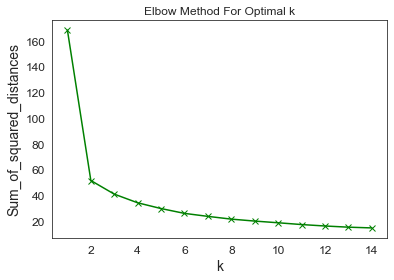

In [62]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


KMeans(n_clusters=4)

In [64]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


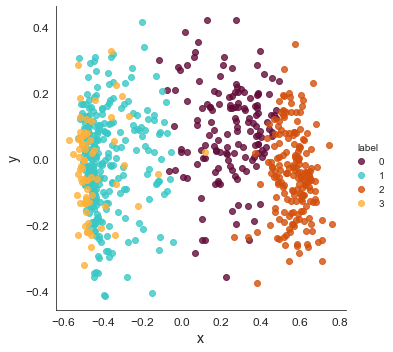

In [65]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [66]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

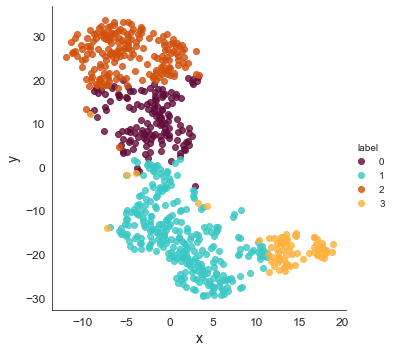

In [67]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

In [68]:
pca.explained_variance_ratio_

array([0.78888994, 0.09103424])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [69]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.137234 -0.328867    -0.027752      0.928009 -0.105083
PC-2      0.977968  0.104434     0.001731      0.180380 -0.011506


# Next step lets explore each of the 4 clusters and see what songs they contain

In [70]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

1    282
2    186
0    146
3     72
Name: label, dtype: int64

In [71]:
songs[songs['label'] == 0].tail(50)

,name,danceability,loudness,speechiness,acousticness,liveness,label
107,Consequences,0.455,0.812408,0.0563,0.889,0.1060,0
272,Into Black,0.705,0.778137,0.0258,0.463,0.1230,0
149,Down On The Corner,0.831,0.754843,0.0837,0.594,0.0736,0
666,Your Turn Now,0.634,0.749885,0.0277,0.819,0.1130,0
179,Falling Asleep,0.537,0.670434,0.0330,0.899,0.0770,0
669,blue,0.725,0.644673,0.2550,0.668,0.0955,0
468,Secrets,0.743,0.857841,0.0519,0.762,0.0939,0
189,Fix You,0.500,0.664414,0.0302,0.671,0.0827,0
217,Goodbye,0.484,0.646725,0.0456,0.406,0.2970,0
589,Twist And Shout - Remastered 2009,0.482,0.756919,0.0452,0.641,0.0414,0


In [72]:
songs[songs['label']==0].mean()
 #happy

danceability    0.540194
loudness        0.711583
speechiness     0.044137
acousticness    0.715945
liveness        0.134763
label           0.000000
dtype: float64

In [73]:
songs[songs['label']==1].head(15)

,name,danceability,loudness,speechiness,acousticness,liveness,label
91,Chop Suey!,0.419,0.878921,0.1200,0.000278,0.1320,1
403,Outside,0.637,0.797648,0.0272,0.092500,0.1560,1
501,South Beach,0.501,0.878160,0.0424,0.030300,0.1140,1
432,Pressure,0.708,0.876776,0.0606,0.008850,0.2850,1
664,"You're Gonna Go Far, Kid",0.547,0.850623,0.0658,0.004850,0.2470,1
665,You're My Best Friend - Remastered 2011,0.518,0.807034,0.0452,0.158000,0.0715,1
573,Tilted Towers,0.702,0.852375,0.0331,0.000771,0.2800,1
644,Wild Wild Son - Club Mix,0.526,0.869142,0.0659,0.001380,0.0975,1
579,To the Moon,0.703,0.626361,0.0428,0.356000,0.0715,1
32,Angry Chair,0.313,0.880143,0.1090,0.064200,0.0581,1


In [74]:
songs[songs['label']==1].mean()
#sad6

danceability    0.547986
loudness        0.814248
speechiness     0.059616
acousticness    0.080313
liveness        0.136566
label           1.000000
dtype: float64

In [75]:
songs[songs['label']==2].head(30)

,name,danceability,loudness,speechiness,acousticness,liveness,label
284,K.,0.348,0.717251,0.0386,0.962,0.1350,2
70,Bloom Innocent,0.519,0.545203,0.0362,0.931,0.1270,2
345,Mind-wanders,0.312,0.378482,0.0437,0.959,0.1110,2
95,Clear Skies,0.421,0.426591,0.0305,0.940,0.1130,2
286,Kaolnite,0.247,0.516121,0.0328,0.622,0.0878,2
220,Goya,0.365,0.469096,0.0427,0.994,0.1190,2
184,Feels Like Flying,0.416,0.651338,0.0423,0.882,0.1160,2
279,Juliens Journey,0.578,0.412638,0.0987,0.994,0.0799,2
94,Cleansing,0.180,0.354543,0.0346,0.956,0.1100,2
59,Betty,0.171,0.515844,0.0348,0.890,0.1010,2


In [76]:
songs[songs['label']==2].mean()
#calm

danceability    0.383559
loudness        0.474180
speechiness     0.041713
acousticness    0.954398
liveness        0.114888
label           2.000000
dtype: float64

In [77]:
songs[songs['label']==3].head(40)

,name,danceability,loudness,speechiness,acousticness,liveness,label
309,Like The First Time - House Mix,0.775,0.748109,0.0383,0.004810,0.661,3
8,A Place for My Head,0.603,0.847878,0.1840,0.014400,0.671,3
13,Afraid of Heights,0.543,0.904935,0.0668,0.000168,0.374,3
139,Devotion And Desire,0.296,0.855627,0.0922,0.000702,0.339,3
457,Rusted From the Rain,0.431,0.887569,0.0306,0.000481,0.385,3
362,My Own Worst Enemy,0.494,0.905466,0.0637,0.001290,0.398,3
465,Savior,0.339,0.890060,0.0620,0.001500,0.425,3
260,ID8,0.576,0.871010,0.0898,0.019800,0.683,3
23,All in the Suit That You Wear,0.429,0.900738,0.0617,0.000019,0.312,3
129,Dani California,0.556,0.914622,0.0437,0.019300,0.346,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F77C0C6E20>,
      dtype=object)

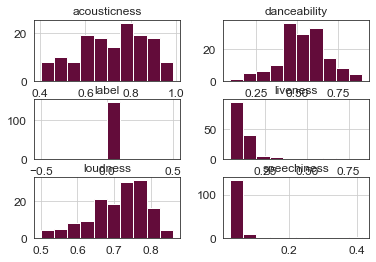

In [78]:
songs[songs['label']==0].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F77F0B3B50>,
      dtype=object)

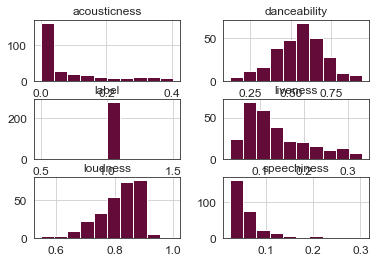

In [79]:
songs[songs['label']==1].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F70036FA90>,
      dtype=object)

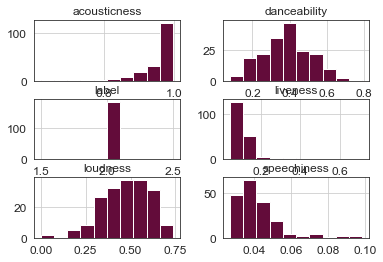

In [80]:
songs[songs['label']==2].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F70050D8E0>,
      dtype=object)

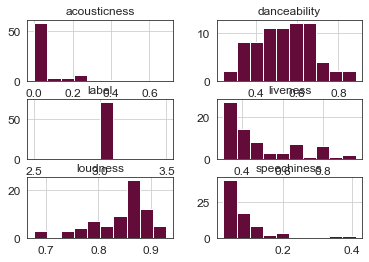

In [81]:
songs[songs['label']==3].hist()

In [82]:
songs[songs['label']==3].mean()
#energetic

danceability    0.536625
loudness        0.842072
speechiness     0.083231
acousticness    0.053245
liveness        0.484931
label           3.000000
dtype: float64

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [85]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[41  0  2  0]
 [ 0 93  0  2]
 [ 1  0 65  0]
 [ 0  1  0 22]]


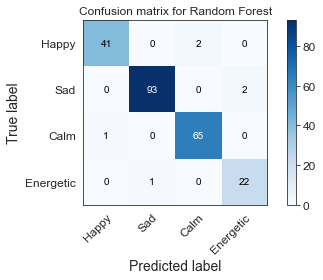

In [86]:
# Confusion matrix
definitions = ['Happy','Sad','Calm','Energetic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [87]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.05642134578272008),
 ('loudness', 0.21382151610169667),
 ('speechiness', 0.03091361789966726),
 ('acousticness', 0.4878093394642391),
 ('liveness', 0.21103418075167676)]

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [89]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[39  2  2  0]
 [ 3 91  0  1]
 [ 0  0 66  0]
 [ 0  2  0 21]]


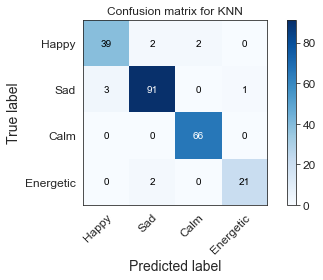

In [90]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [91]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[43  0  0  0]
 [ 0 95  0  0]
 [ 0  0 66  0]
 [ 0 12  0 11]]


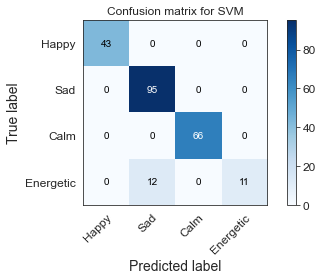

In [92]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\Ezhil Mathi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [95]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[42  1  0  0]
 [ 1 94  0  0]
 [ 0  0 66  0]
 [ 0  7  0 16]]


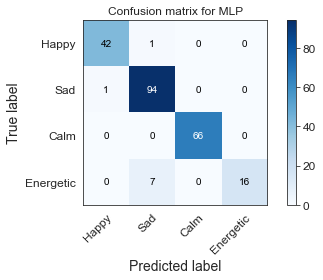

In [96]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [97]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Happy       0.98      0.98      0.98        43
         Sad       0.92      0.99      0.95        95
        Calm       1.00      1.00      1.00        66
   Energetic       1.00      0.70      0.82        23

    accuracy                           0.96       227
   macro avg       0.97      0.92      0.94       227
weighted avg       0.96      0.96      0.96       227
MLP


In [98]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        43
         Sad       0.89      1.00      0.94        95
        Calm       1.00      1.00      1.00        66
   Energetic       1.00      0.48      0.65        23

    accuracy                           0.95       227
   macro avg       0.97      0.87      0.90       227
weighted avg       0.95      0.95      0.94       227
SVM


In [99]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Happy       0.93      0.91      0.92        43
         Sad       0.96      0.96      0.96        95
        Calm       0.97      1.00      0.99        66
   Energetic       0.95      0.91      0.93        23

    accuracy                           0.96       227
   macro avg       0.95      0.94      0.95       227
weighted avg       0.96      0.96      0.96       227
KNN


In [100]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Happy       0.98      0.95      0.96        43
         Sad       0.99      0.98      0.98        95
        Calm       0.97      0.98      0.98        66
   Energetic       0.92      0.96      0.94        23

    accuracy                           0.97       227
   macro avg       0.96      0.97      0.97       227
weighted avg       0.97      0.97      0.97       227
forest
